# TASK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

In [3]:
lefthanded_data

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906
...,...,...,...
72,82,7.350204,4.874899
73,83,6.471204,5.672536
74,84,6.510858,5.774881
75,85,7.337968,7.051459


Text(0, 0.5, 'Age')

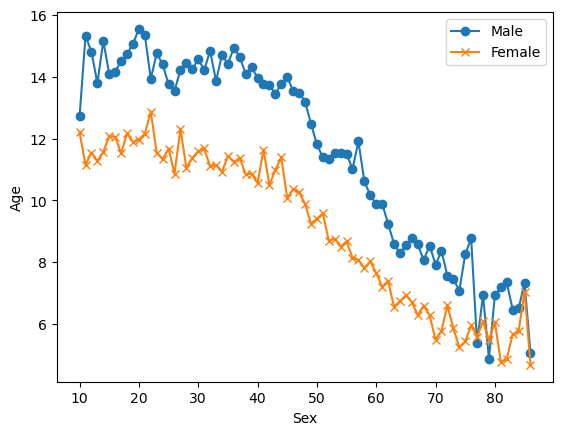

In [4]:
fig, ax = plt.subplots()
ax.plot("Age", "Male", data=lefthanded_data, marker="o")
ax.plot("Age", "Female", data=lefthanded_data, marker="x")
ax.legend()
ax.set_xlabel("Sex")
ax.set_ylabel("Age")

# TASK 2

Text(0, 0.5, 'Mean_lh')

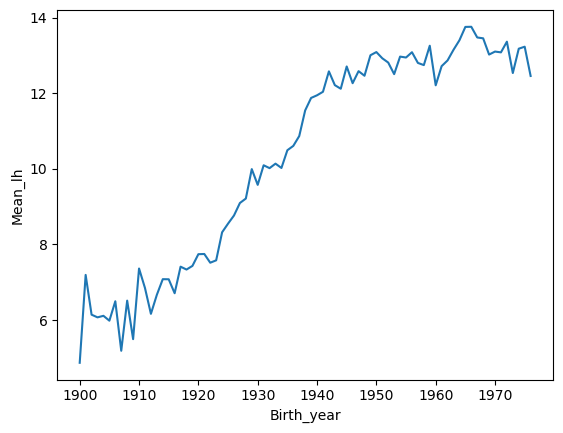

In [7]:
lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]
lefthanded_data["Mean_lh"] = lefthanded_data[["Male", "Female"]].mean(axis=1)
fig, ax = plt.subplots()
ax.plot("Birth_year", "Mean_lh", data = lefthanded_data)
ax.set_xlabel("Birth_year")
ax.set_ylabel("Mean_lh")

# TASK 3

In [12]:
import numpy as np
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """
    
    early_1900s_rate = lefthanded_data["Mean_lh"][-10:].mean()
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 
    oldest_age = study_year - 1986 + 86

    P_return = np.zeros(ages_of_death.shape)
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100

    return P_return

# TASK 4

In [16]:
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep = "\t", skiprows=[1])

In [18]:
death_distribution_data

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
120,120,1.0,NaN,1.0
121,121,NaN,NaN,NaN
122,122,NaN,NaN,NaN
123,123,NaN,NaN,NaN


In [20]:
death_distribution_data['Male']=death_distribution_data['Male'].fillna(0)
death_distribution_data['Female']=death_distribution_data['Female'].fillna(0)

In [22]:
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

In [24]:
death_distribution_data

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0
...,...,...,...,...
115,115,3.0,0.0,3.0
117,117,3.0,2.0,1.0
118,118,1.0,0.0,1.0
119,119,2.0,0.0,2.0


Text(0, 0.5, 'Both Sexes')

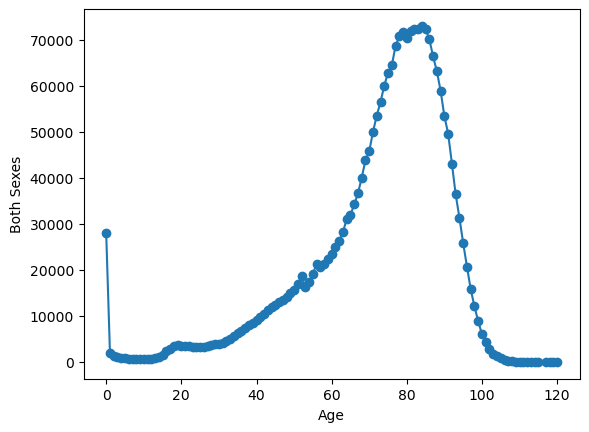

In [26]:
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') 
ax.set_xlabel('Age')
ax.set_ylabel('Both Sexes')

# TASK 5

In [29]:
def P_lh(death_distribution_data, study_year = 1990):
    """ Overall probability of being left-handed if you died in the study year
    P_lh = P(LH | Age of death) P(Age of death) + P(LH | not A) P(not A) = sum over ages
    Input: dataframe of death distribution data
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Both Sexes']) 
print(P_lh(death_distribution_data))

0.07766387615350638


# TASK 6

In [32]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) 
    P_lh_A = P_lh_given_A(ages_of_death, study_year) 
    return P_lh_A*P_A/P_left

# TASK 7

In [35]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) 
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) 
    return P_rh_A*P_A/P_right

# TASK 8

Text(0, 0.5, 'Probability of being age A at death')

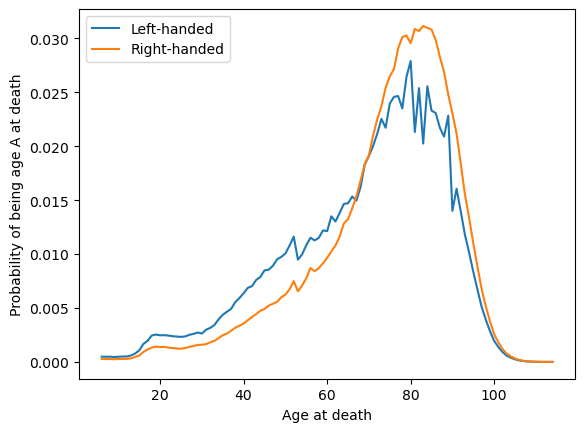

In [38]:
ages = np.arange(6, 115, 1)

left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots() 
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = 'Right-handed')
ax.legend() 
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

# TASK 9

In [41]:
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))
print("Average age of lefthanded" + str(average_lh_age))
print("Average age of righthanded" + str(average_rh_age))
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

Average age of lefthanded67.24503662801027
Average age of righthanded72.79171936526477
The difference in average ages is 5.5 years.


# TASK 10

In [44]:
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))
print("The difference in average ages is " +
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
